#ðŸ“Œ ExtracciÃ³n

DescripciÃ³n
Para iniciar tu anÃ¡lisis, necesitarÃ¡s importar los datos de la API de Telecom X. Estos datos estÃ¡n disponibles en formato JSON y contienen informaciÃ³n esencial sobre los clientes, incluyendo datos demogrÃ¡ficos, tipo de servicio contratado y estado de evasiÃ³n.

ðŸ“Œ Enlace de la API:
ðŸ”— challenge2-data-science-LATAM/TelecomX_Data.json at main Â· ingridcristh/challenge2-data-science-LATAM

ðŸ”—GitHub - ingridcristh/challenge2-data-science-LATAM

Â¿QuÃ© debes hacer?
âœ… Cargar los datos directamente desde la API utilizando Python.
âœ… Convertir los datos a un DataFrame de Pandas para facilitar su manipulaciÃ³n.


In [73]:
import pandas as pd
import requests

# URL del archivo JSON en formato "raw"
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Cargar el contenido JSON desde la URL
response = requests.get(url)
data = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas
df.head()

customerID Churn                                           customer                                            phone                                           internet                                            account
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   {'PhoneService': 'Yes', 'MultipleLines': 'No'}  {'InternetService': 'DSL', 'OnlineSecurity': '...  {'Contract': 'One year', 'PaperlessBilling': '...
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}  {'InternetService': 'DSL', 'OnlineSecurity': '...  {'Contract': 'Month-to-month', 'PaperlessBilli...
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   {'PhoneService': 'Yes', 'MultipleLines': 'No'}  {'InternetService': 'Fiber optic', 'OnlineSecu...  {'Contract': 'Month-to-month', 'PaperlessBilli...
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   {'PhoneService': 'Yes', 'MultipleLines': 'No'}  {'InternetService': 'Fiber optic', 'OnlineSecu...  {'Contract': 'Month-to-month', 'PaperlessBilli...
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   {'PhoneService': 'Yes', 'MultipleLines': 'No'}  {'InternetService': 'Fiber optic', 'OnlineSecu...  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [74]:


#  Normalizar datos anidados
df = pd.json_normalize(
    data,
    sep="_"  # Para usar nombres como 'customer_gender' en lugar de jerarquÃ­as
)

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas al hacer df.head()
pd.set_option('display.expand_frame_repr', False)  # Evita saltos de lÃ­nea en la tabla

df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines internet_InternetService internet_OnlineSecurity internet_OnlineBackup internet_DeviceProtection internet_TechSupport internet_StreamingTV internet_StreamingMovies account_Contract account_PaperlessBilling account_PaymentMethod  account_Charges_Monthly account_Charges_Total
0  0002-ORFBO    No          Female                       0              Yes                 Yes                9                Yes                  No                      DSL                      No                   Yes                        No                  Yes                  Yes                       No         One year                      Yes          Mailed check                     65.6                 593.3
1  0003-MKNFE    No            Male                       0               No                  No                9                Yes                 Yes                      DSL                      No                    No                        No                   No                   No                      Yes   Month-to-month                       No          Mailed check                     59.9                 542.4
2  0004-TLHLJ   Yes            Male                       0               No                  No                4                Yes                  No              Fiber optic                      No                    No                       Yes                   No                   No                       No   Month-to-month                      Yes      Electronic check                     73.9                280.85
3  0011-IGKFF   Yes            Male                       1              Yes                  No               13                Yes                  No              Fiber optic                      No                   Yes                       Yes                   No                  Yes                      Yes   Month-to-month                      Yes      Electronic check                     98.0               1237.85
4  0013-EXCHZ   Yes          Female                       1              Yes                  No                3                Yes                  No              Fiber optic                      No                    No                        No                  Yes                  Yes                       No   Month-to-month                      Yes          Mailed check                     83.9                 267.4

In [75]:
#'internet_OnlineSecurity' in df.columns


In [76]:
#for col in df.columns:
   # print(col)

#ðŸ”§ TransformaciÃ³n

DescripciÃ³n

Ahora que has extraÃ­do los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudarÃ¡ a identificar quÃ© variables son mÃ¡s relevantes para el anÃ¡lisis de evasiÃ³n de clientes.

ðŸ“Œ Para facilitar este proceso, hemos creado un diccionario de datos con la descripciÃ³n de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la informaciÃ³n disponible.

ðŸ”— Enlace al diccionario y a la API

Â¿QuÃ© debes hacer?
âœ… Explorar las columnas del dataset y verificar sus tipos de datos.
âœ… Consultar el diccionario para comprender mejor el significado de las variables.
âœ… Identificar las columnas mÃ¡s relevantes para el anÃ¡lisis de evasiÃ³n.

Diccionario de datos:

columnas mas relevantes

Churn: si el cliente dejÃ³ o no la empresa

gender: gÃ©nero (masculino y femenino)

SeniorCitizen: informaciÃ³n sobre si un cliente tiene o no una edad igual o mayor a 65 aÃ±os

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en lÃ­nea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

In [77]:
# Ver estructura general
df.info()

# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

En este paso, verifica si hay problemas en los datos que puedan afectar el anÃ¡lisis. Presta atenciÃ³n a valores ausentes, duplicados, errores de formato e inconsistencias en las categorÃ­as. Este proceso es esencial para asegurarte de que los datos estÃ©n listos para las siguientes etapas.

In [78]:
df.isnull().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64

In [79]:
# Duplicados por fila completa
df.duplicated().sum()

np.int64(0)

In [80]:
# Revisar valores Ãºnicos "problemÃ¡ticos"
df['account_Charges_Total'].unique()[:10]

array(['593.3', '542.4', '280.85', '1237.85', '267.4', '571.45',
       '7904.25', '5377.8', '340.35', '5957.9'], dtype=object)

In [81]:
# Reemplazar valores vacÃ­os por NaN y convertir a float
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')


In [82]:
# Seleccionar columnas categÃ³ricas
cat_cols = df.select_dtypes(include='object').columns



In [83]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

DescripciÃ³n


Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estÃ©n completos y coherentes, preparÃ¡ndolos para las siguientes etapas del anÃ¡lisis.

ðŸ“Œ Tips:

ðŸ”— ManipulaciÃ³n de strings en pandas: lower, replace, startswith y contains | Alura Cursos Online

In [84]:

import numpy as np
import pandas as pd

# Identificar columnas tipo object
object_cols = df.select_dtypes(include='object').columns

# Limpiar y estandarizar sin cambiar el tipo de dato
for col in object_cols:
    df[col] = df[col].str.strip()            # Eliminar espacios iniciales y finales
    df[col] = df[col].str.lower()            # Convertir a minÃºsculas
    df[col] = df[col].replace({'': np.nan, ' ': np.nan})  # Reemplazar vacÃ­os y espacios por NaN

# VerificaciÃ³n rÃ¡pida
print(" Limpieza completada.\n")

print(" RevisiÃ³n de valores nulos por columna:")
print(df[object_cols].isnull().sum())

print("\n Ejemplo de valores Ãºnicos en columnas textuales:")
for col in object_cols[:5]:  # Muestra las primeras 5 por simplicidad
    print(f"{col}: {df[col].unique()[:5]}")

 Limpieza completada.

 RevisiÃ³n de valores nulos por columna:
customerID                     0
Churn                        224
customer_gender                0
customer_Partner               0
customer_Dependents            0
phone_PhoneService             0
phone_MultipleLines            0
internet_InternetService       0
internet_OnlineSecurity        0
internet_OnlineBackup          0
internet_DeviceProtection      0
internet_TechSupport           0
internet_StreamingTV           0
internet_StreamingMovies       0
account_Contract               0
account_PaperlessBilling       0
account_PaymentMethod          0
dtype: int64

 Ejemplo de valores Ãºnicos en columnas textuales:
customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' '0011-igkff' '0013-exchz']
Churn: ['no' 'yes' nan]
customer_gender: ['female' 'male']
customer_Partner: ['yes' 'no']
customer_Dependents: ['yes' 'no']


In [85]:
#eliminar en churn los nan
# Filtrar registros donde Churn no es NaN
df = df[df['Churn'].notna()].copy()

# Confirmar la eliminaciÃ³n
print(f"Cantidad de registros despuÃ©s de filtrar: {len(df)}")
print(f"Valores nulos en 'Churn' despuÃ©s de filtrar: {df['Churn'].isna().sum()}")

# Verificar cuÃ¡ntos NaNs quedan en todo el DataFrame
print("\nConteo de valores nulos por columna despuÃ©s de filtrar:")
print(df.isna().sum())

Cantidad de registros despuÃ©s de filtrar: 7043
Valores nulos en 'Churn' despuÃ©s de filtrar: 0

Conteo de valores nulos por columna despuÃ©s de filtrar:
customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64


In [86]:
# Rellenar los NaN en 'account_Charges_Total' con el producto de tenure y monthly charges
df['account_Charges_Total'] = df['account_Charges_Total'].fillna(
    df['customer_tenure'] * df['account_Charges_Monthly']
)

In [87]:
print(f"Valores nulos restantes en 'account_Charges_Total': {df['account_Charges_Total'].isna().sum()}")

Valores nulos restantes en 'account_Charges_Total': 0


In [88]:
# Ver estructura general
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines internet_InternetService internet_OnlineSecurity internet_OnlineBackup internet_DeviceProtection internet_TechSupport internet_StreamingTV internet_StreamingMovies account_Contract account_PaperlessBilling account_PaymentMethod  account_Charges_Monthly  account_Charges_Total
0  0002-orfbo    no          female                       0              yes                 yes                9                yes                  no                      dsl                      no                   yes                        no                  yes                  yes                       no         one year                      yes          mailed check                     65.6                 593.30
1  0003-mknfe    no            male                       0               no                  no                9                yes                 yes                      dsl                      no                    no                        no                   no                   no                      yes   month-to-month                       no          mailed check                     59.9                 542.40
2  0004-tlhlj   yes            male                       0               no                  no                4                yes                  no              fiber optic                      no                    no                       yes                   no                   no                       no   month-to-month                      yes      electronic check                     73.9                 280.85
3  0011-igkff   yes            male                       1              yes                  no               13                yes                  no              fiber optic                      no                   yes                       yes                   no                  yes                      yes   month-to-month                      yes      electronic check                     98.0                1237.85
4  0013-exchz   yes          female                       1              yes                  no                3                yes                  no              fiber optic                      no                    no                        no                  yes                  yes                       no   month-to-month                      yes          mailed check                     83.9                 267.40

Ahora que los datos estÃ¡n limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturaciÃ³n mensual para calcular el valor diario, proporcionando una visiÃ³n mÃ¡s detallada del comportamiento de los clientes a lo largo del tiempo.

ðŸ“Œ Esta columna te ayudarÃ¡ a profundizar en el anÃ¡lisis y a obtener informaciÃ³n valiosa para las siguientes etapas.

In [89]:
# Crear columna Cuentas_Diarias con redondeo a 2 decimales
df['Cuentas_Diarias'] = (df['account_Charges_Monthly'] / 30).round(2)

# Verificar resultados
print(df[['account_Charges_Monthly', 'Cuentas_Diarias']].head())

   account_Charges_Monthly  Cuentas_Diarias
0                     65.6             2.19
1                     59.9             2.00
2                     73.9             2.46
3                     98.0             3.27
4                     83.9             2.80


In [90]:
# Lista de columnas a tratar
cols = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# FunciÃ³n de limpieza personalizada
def estandarizar_si_no(valor):
    if pd.isna(valor):
        return np.nan
    valor = str(valor).strip().lower()
    if valor.startswith('no'):
        return 'no'
    elif valor.startswith('yes'):
        return 'yes'
    return valor  # por si queda algÃºn otro valor

# Aplicar la funciÃ³n a cada columna
for col in cols:
    df[col] = df[col].apply(estandarizar_si_no)

# Mostrar valores Ãºnicos por columna (verificaciÃ³n rÃ¡pida)
print("ðŸ”Ž Valores Ãºnicos por columna:")
for col in cols:
    print(f"{col}: {df[col].unique()}")

# Contar NaNs por columna
print("\n Conteo de NaNs por columna:")
print(df[cols].isnull().sum())

ðŸ”Ž Valores Ãºnicos por columna:
Churn: ['no' 'yes']
customer_Partner: ['yes' 'no']
customer_Dependents: ['yes' 'no']
phone_PhoneService: ['yes' 'no']
phone_MultipleLines: ['no' 'yes']
internet_OnlineSecurity: ['no' 'yes']
internet_OnlineBackup: ['yes' 'no']
internet_DeviceProtection: ['no' 'yes']
internet_TechSupport: ['yes' 'no']
internet_StreamingTV: ['yes' 'no']
internet_StreamingMovies: ['no' 'yes']

 Conteo de NaNs por columna:
Churn                        0
customer_Partner             0
customer_Dependents          0
phone_PhoneService           0
phone_MultipleLines          0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
dtype: int64


La estandarizaciÃ³n y transformaciÃ³n de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la informaciÃ³n sea mÃ¡s consistente, comprensible y adecuada para el anÃ¡lisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "SÃ­" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemÃ¡tico y la aplicaciÃ³n de modelos analÃ­ticos.

AdemÃ¡s, traducir o renombrar columnas y datos hace que la informaciÃ³n sea mÃ¡s accesible y fÃ¡cil de entender, especialmente cuando se trabaja con fuentes externas o tÃ©rminos tÃ©cnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicaciÃ³n de los resultados, facilitando la interpretaciÃ³n y evitando confusiones, especialmente al compartir informaciÃ³n con stakeholders no tÃ©cnicos.

In [91]:
# Lista de columnas a transformar
columnas_binarias = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Reemplazar 'yes' por 1 y 'no' por 0
df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})


/tmp/ipython-input-91-2667542902.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})


In [92]:
# Convertir las columnas binarias a tipo int64
#columnas_binarias = [
  ##  'Churn',
  #  'customer_Partner',
  # 'customer_Dependents',
  #  'phone_PhoneService',
  #  'phone_MultipleLines',
  #  'internet_OnlineSecurity',
  #  'internet_OnlineBackup',
  #  'internet_DeviceProtection',
  #  'internet_TechSupport',
  #  'internet_StreamingTV',
  #  'internet_StreamingMovies',
  #  'account_PaperlessBilling'
#]
#df[columnas_binarias] = df[columnas_binarias].astype('int64')

In [93]:
print(df[columnas_binarias].dtypes)

Churn                        int64
customer_Partner             int64
customer_Dependents          int64
phone_PhoneService           int64
phone_MultipleLines          int64
internet_OnlineSecurity      int64
internet_OnlineBackup        int64
internet_DeviceProtection    int64
internet_TechSupport         int64
internet_StreamingTV         int64
internet_StreamingMovies     int64
account_PaperlessBilling     int64
dtype: object


In [94]:
# Diccionario con los nuevos nombres de columnas
nuevos_nombres = {
    'Churn': 'baja_cliente',
    'customer_gender': 'cliente_genero',
    'customer_SeniorCitizen': 'cli_mayor_65',
    'customer_Partner': 'cli_tiene_pareja',
    'customer_Dependents': 'cl_tiene_hijos',
    'customer_tenure': 'meses_contrato',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'factura_online',
    'account_PaymentMethod': 'metodo_pago',
    'account_Charges_Monthly': 'total_mensual_servicios',
    'account_Charges_Total': 'gasto_total_cliente',
    'phone_PhoneService': 'servicio_telefono',
    'phone_MultipleLines': 'tel_multiples_lineas',
    'internet_OnlineSecurity': 'internet_seguridad_online',
    'internet_OnlineBackup': 'internet_respaldo_online',
    'internet_DeviceProtection': 'internet_proteccion_dispositivo',
    'internet_TechSupport': 'internet_sop_tecnico',
    'internet_StreamingTV': 'internet_streaming_tv',
    'internet_StreamingMovies': 'internet_streaming_pelic',
    'Cuentas_Diarias': 'cuentas_diarias'

}

# Renombrar las columnas
df.rename(columns=nuevos_nombres, inplace=True)

In [95]:
# Reemplazar 'female' por 'femenino' y 'male' por 'masculino' en la columna 'cliente_genero'
df['cliente_genero'] = df['cliente_genero'].replace({
    'female': 'femenino',
    'male': 'masculino'
})

# Verificar los valores Ãºnicos luego del reemplazo
print("Valores Ãºnicos en 'cliente_genero':")
print(df['cliente_genero'].unique())

Valores Ãºnicos en 'cliente_genero':
['femenino' 'masculino']


In [96]:
# Ver estructura general
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7043 non-null   object 
 1   baja_cliente                     7043 non-null   int64  
 2   cliente_genero                   7043 non-null   object 
 3   cli_mayor_65                     7043 non-null   int64  
 4   cli_tiene_pareja                 7043 non-null   int64  
 5   cl_tiene_hijos                   7043 non-null   int64  
 6   meses_contrato                   7043 non-null   int64  
 7   servicio_telefono                7043 non-null   int64  
 8   tel_multiples_lineas             7043 non-null   int64  
 9   internet_InternetService         7043 non-null   object 
 10  internet_seguridad_online        7043 non-null   int64  
 11  internet_respaldo_online         7043 non-null   int64  
 12  internet_proteccion_dispo

customerID  baja_cliente cliente_genero  cli_mayor_65  cli_tiene_pareja  cl_tiene_hijos  meses_contrato  servicio_telefono  tel_multiples_lineas internet_InternetService  internet_seguridad_online  internet_respaldo_online  internet_proteccion_dispositivo  internet_sop_tecnico  internet_streaming_tv  internet_streaming_pelic   tipo_contrato  factura_online       metodo_pago  total_mensual_servicios  gasto_total_cliente  cuentas_diarias
0  0002-orfbo             0       femenino             0                 1               1               9                  1                     0                      dsl                          0                         1                                0                     1                      1                         0        one year               1      mailed check                     65.6               593.30             2.19
1  0003-mknfe             0      masculino             0                 0               0               9                  1                     1                      dsl                          0                         0                                0                     0                      0                         1  month-to-month               0      mailed check                     59.9               542.40             2.00
2  0004-tlhlj             1      masculino             0                 0               0               4                  1                     0              fiber optic                          0                         0                                1                     0                      0                         0  month-to-month               1  electronic check                     73.9               280.85             2.46
3  0011-igkff             1      masculino             1                 1               0              13                  1                     0              fiber optic                          0                         1                                1                     0                      1                         1  month-to-month               1  electronic check                     98.0              1237.85             3.27
4  0013-exchz             1       femenino             1                 1               0               3                  1                     0              fiber optic                          0                         0                                0                     1                      1                         0  month-to-month               1      mailed check                     83.9               267.40             2.80

In [97]:
# Guardar el DataFrame como archivo CSV
df.to_csv('datos_tratados.csv', index=False)

#ðŸ“Š Carga y anÃ¡lisis

DescripciÃ³n
Editar
Para comenzar, realiza un anÃ¡lisis descriptivo de los datos, calculando mÃ©tricas como media, mediana, desviaciÃ³n estÃ¡ndar y otras medidas que ayuden a comprender mejor la distribuciÃ³n y el comportamiento de los clientes.

In [98]:
# AnÃ¡lisis estadÃ­stico bÃ¡sico para variables numÃ©ricas
df.describe().T

count         mean          std    min     25%      50%      75%      max
baja_cliente                     7043.0     0.265370     0.441561   0.00    0.00     0.00     1.00     1.00
cli_mayor_65                     7043.0     0.162147     0.368612   0.00    0.00     0.00     0.00     1.00
cli_tiene_pareja                 7043.0     0.483033     0.499748   0.00    0.00     0.00     1.00     1.00
cl_tiene_hijos                   7043.0     0.299588     0.458110   0.00    0.00     0.00     1.00     1.00
meses_contrato                   7043.0    32.371149    24.559481   0.00    9.00    29.00    55.00    72.00
servicio_telefono                7043.0     0.903166     0.295752   0.00    1.00     1.00     1.00     1.00
tel_multiples_lineas             7043.0     0.421837     0.493888   0.00    0.00     0.00     1.00     1.00
internet_seguridad_online        7043.0     0.286668     0.452237   0.00    0.00     0.00     1.00     1.00
internet_respaldo_online         7043.0     0.344881     0.475363   0.00    0.00     0.00     1.00     1.00
internet_proteccion_dispositivo  7043.0     0.343888     0.475038   0.00    0.00     0.00     1.00     1.00
internet_sop_tecnico             7043.0     0.290217     0.453895   0.00    0.00     0.00     1.00     1.00
internet_streaming_tv            7043.0     0.384353     0.486477   0.00    0.00     0.00     1.00     1.00
internet_streaming_pelic         7043.0     0.387903     0.487307   0.00    0.00     0.00     1.00     1.00
factura_online                   7043.0     0.592219     0.491457   0.00    0.00     1.00     1.00     1.00
total_mensual_servicios          7043.0    64.761692    30.090047  18.25   35.50    70.35    89.85   118.75
gasto_total_cliente              7043.0  2279.734304  2266.794470   0.00  398.55  1394.55  3786.60  8684.80
cuentas_diarias                  7043.0     2.158675     1.003088   0.61    1.18     2.34     2.99     3.96

In [99]:
columnas_numericas = [
    'meses_contrato', 'total_mensual_servicios', 'gasto_total_cliente', 'cuentas_diarias'
]

for col in columnas_numericas:
    print(f" EstadÃ­sticas para {col}:")
    print(f" - Media: {df[col].mean():.2f}")
    print(f" - Mediana: {df[col].median():.2f}")
    print(f" - DesviaciÃ³n estÃ¡ndar: {df[col].std():.2f}")
    print(f" - Valor mÃ­nimo: {df[col].min():.2f}")
    print(f" - Valor mÃ¡ximo: {df[col].max():.2f}")
    print(f" - Valores Ãºnicos: {df[col].nunique()}")
    print("â€”" * 40)

 EstadÃ­sticas para meses_contrato:
 - Media: 32.37
 - Mediana: 29.00
 - DesviaciÃ³n estÃ¡ndar: 24.56
 - Valor mÃ­nimo: 0.00
 - Valor mÃ¡ximo: 72.00
 - Valores Ãºnicos: 73
â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”
 EstadÃ­sticas para total_mensual_servicios:
 - Media: 64.76
 - Mediana: 70.35
 - DesviaciÃ³n estÃ¡ndar: 30.09
 - Valor mÃ­nimo: 18.25
 - Valor mÃ¡ximo: 118.75
 - Valores Ãºnicos: 1585
â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”
 EstadÃ­sticas para gasto_total_cliente:
 - Media: 2279.73
 - Mediana: 1394.55
 - DesviaciÃ³n estÃ¡ndar: 2266.79
 - Valor mÃ­nimo: 0.00
 - Valor mÃ¡ximo: 8684.80
 - Valores Ãºnicos: 6531
â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”
 EstadÃ­sticas para cuentas_diarias:
 - Media: 2.16
 - Mediana: 2.34
 - DesviaciÃ³n estÃ¡ndar

En este paso, el objetivo es comprender cÃ³mo estÃ¡ distribuida la variable "churn" (evasiÃ³n) entre los clientes. Utiliza grÃ¡ficos para visualizar la proporciÃ³n de clientes que permanecieron y los que se dieron de baja.

In [100]:
# Conteo de clientes que permanecen (0) y que se dieron de baja (1)
print("Conteo absoluto de clientes:")
print(df['baja_cliente'].value_counts())

print("\nProporciÃ³n de clientes (%):")
print((df['baja_cliente'].value_counts(normalize=True) * 100).round(2))

Conteo absoluto de clientes:
baja_cliente
0    5174
1    1869
Name: count, dtype: int64

ProporciÃ³n de clientes (%):
baja_cliente
0    73.46
1    26.54
Name: proportion, dtype: float64


In [101]:
import matplotlib.pyplot as plt

def graficar_pie_binario(df, columna, titulo_legible):
    """
    Genera un grÃ¡fico de torta para una variable binaria del DataFrame.

    ParÃ¡metros:
    - df: DataFrame
    - columna: str â†’ nombre de la columna binaria
    - titulo_legible: str â†’ cÃ³mo querÃ©s que aparezca el nombre en el tÃ­tulo
    """
    # Conteo de valores
    valores = df[columna].value_counts()
    total = valores.sum()

    # Etiquetas: 0 â†’ SI, 1 â†’ NO
    etiquetas_dict = {0: 'NO', 1: 'SI'}
    etiquetas = [f'{etiquetas_dict[i]} - {valores[i]} casos' for i in valores.index]

    # Colores personalizados (opcional)
    colores = ['#a1d99b', '#fc9272']  # verde claro y rojo suave

    # GrÃ¡fico
    plt.figure(figsize=(6, 6))
    plt.pie(
        valores,
        labels=etiquetas,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores
    )
    plt.title(f'{titulo_legible}\nTotal de casos analizados: {total}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

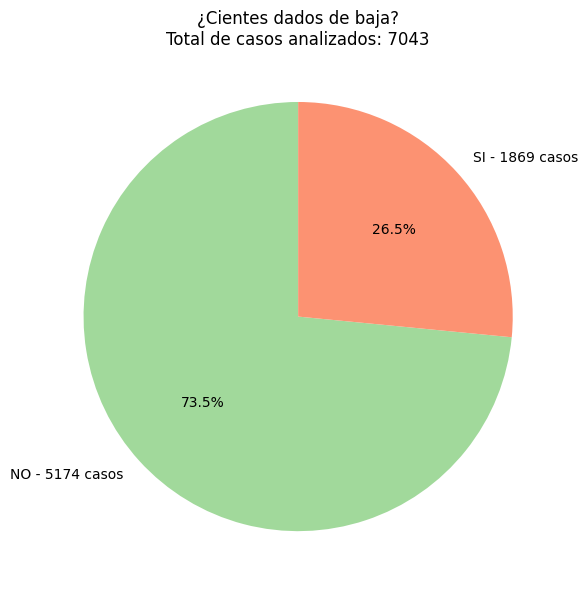

In [102]:
graficar_pie_binario(df, 'baja_cliente', 'Â¿Cientes dados de baja?')

Ahora, exploraremos cÃ³mo se distribuye la evasiÃ³n segÃºn variables categÃ³ricas, como gÃ©nero, tipo de contrato, mÃ©todo de pago, entre otras.

Este anÃ¡lisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudarÃ¡ a orientar acciones estratÃ©gicas.

In [103]:
# FunciÃ³n para mostrar la distribuciÃ³n de baja por categorÃ­a con conteos y porcentajes
def churn_por_categoria(columna):
    # Cantidades absolutas
    conteo_absoluto = pd.crosstab(df[columna], df['baja_cliente'])

    # Porcentajes
    tabla_pct = pd.crosstab(df[columna], df['baja_cliente'], normalize='index') * 100
    tabla_pct = tabla_pct.round(2)
    tabla_pct.columns = ['Permanecen (%)', 'Baja (%)']

    # Renombrar columnas absolutas
    conteo_absoluto.columns = ['NÂº Permanecen', 'NÂº Baja']

    # Total de registros por categorÃ­a
    cantidad = df[columna].value_counts().sort_index()

    # Combinar columnas
    tabla_final = pd.concat([conteo_absoluto, tabla_pct], axis=1)
    tabla_final['Cantidad'] = cantidad

    # Reordenar columnas
    tabla_final = tabla_final[['Cantidad', 'NÂº Permanecen', 'Permanecen (%)', 'NÂº Baja', 'Baja (%)']]

    display(tabla_final)

# Lista de variables categÃ³ricas a analizar
categoricas = [
    'cliente_genero', 'tipo_contrato', 'metodo_pago',
    'factura_online', 'cli_tiene_pareja', 'cli_mayor_65', 'cl_tiene_hijos'
]

# Aplicar la funciÃ³n a cada variable categÃ³rica
for col in categoricas:
    print(f"\nðŸ“Š DistribuciÃ³n de baja por: {col}")
    churn_por_categoria(col)


ðŸ“Š DistribuciÃ³n de baja por: cliente_genero


Cantidad  NÂº Permanecen  Permanecen (%)  NÂº Baja  Baja (%)
cliente_genero                                                            
femenino            3488           2549           73.08      939     26.92
masculino           3555           2625           73.84      930     26.16


ðŸ“Š DistribuciÃ³n de baja por: tipo_contrato


Cantidad  NÂº Permanecen  Permanecen (%)  NÂº Baja  Baja (%)
tipo_contrato                                                             
month-to-month      3875           2220           57.29     1655     42.71
one year            1473           1307           88.73      166     11.27
two year            1695           1647           97.17       48      2.83


ðŸ“Š DistribuciÃ³n de baja por: metodo_pago


Cantidad  NÂº Permanecen  Permanecen (%)  NÂº Baja  Baja (%)
metodo_pago                                                                          
bank transfer (automatic)      1544           1286           83.29      258     16.71
credit card (automatic)        1522           1290           84.76      232     15.24
electronic check               2365           1294           54.71     1071     45.29
mailed check                   1612           1304           80.89      308     19.11


ðŸ“Š DistribuciÃ³n de baja por: factura_online


Cantidad  NÂº Permanecen  Permanecen (%)  NÂº Baja  Baja (%)
factura_online                                                            
0                   2872           2403           83.67      469     16.33
1                   4171           2771           66.43     1400     33.57


ðŸ“Š DistribuciÃ³n de baja por: cli_tiene_pareja


Cantidad  NÂº Permanecen  Permanecen (%)  NÂº Baja  Baja (%)
cli_tiene_pareja                                                            
0                     3641           2441           67.04     1200     32.96
1                     3402           2733           80.34      669     19.66


ðŸ“Š DistribuciÃ³n de baja por: cli_mayor_65


Cantidad  NÂº Permanecen  Permanecen (%)  NÂº Baja  Baja (%)
cli_mayor_65                                                            
0                 5901           4508           76.39     1393     23.61
1                 1142            666           58.32      476     41.68


ðŸ“Š DistribuciÃ³n de baja por: cl_tiene_hijos


Cantidad  NÂº Permanecen  Permanecen (%)  NÂº Baja  Baja (%)
cl_tiene_hijos                                                            
0                   4933           3390           68.72     1543     31.28
1                   2110           1784           84.55      326     15.45

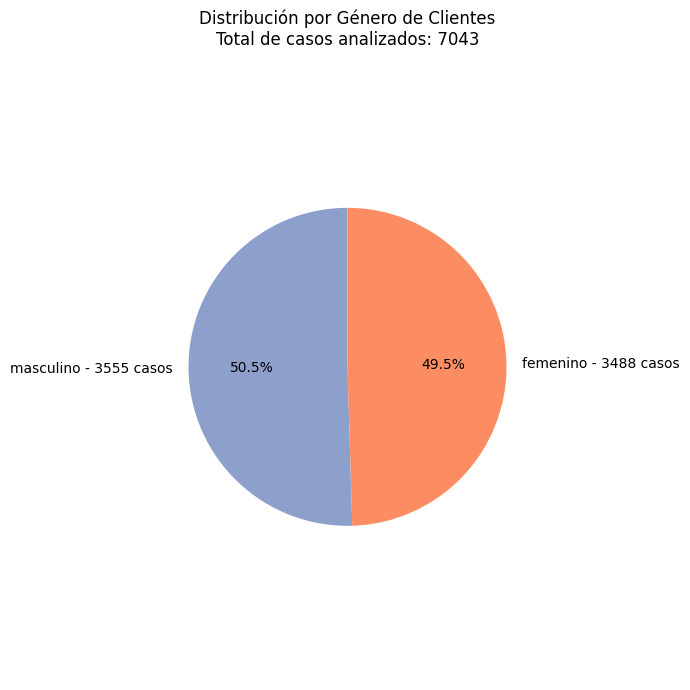

In [104]:
import matplotlib.pyplot as plt

# Conteo de gÃ©nero
valores = df['cliente_genero'].value_counts()
etiquetas = valores.index.tolist()  # ['Femenino', 'Masculino']
total = valores.sum()

# Etiquetas personalizadas
etiquetas_con_valores = [
    f'{label} - {valores[label]} casos' for label in etiquetas
]

# GrÃ¡fico
plt.figure(figsize=(7, 7))
plt.pie(
    valores,
    labels=etiquetas_con_valores,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8da0cb', '#fc8d62']
)
plt.title(f'DistribuciÃ³n por GÃ©nero de Clientes\nTotal de casos analizados: {total}')
plt.axis('equal')  # CÃ­rculo perfecto
plt.tight_layout()
plt.show()

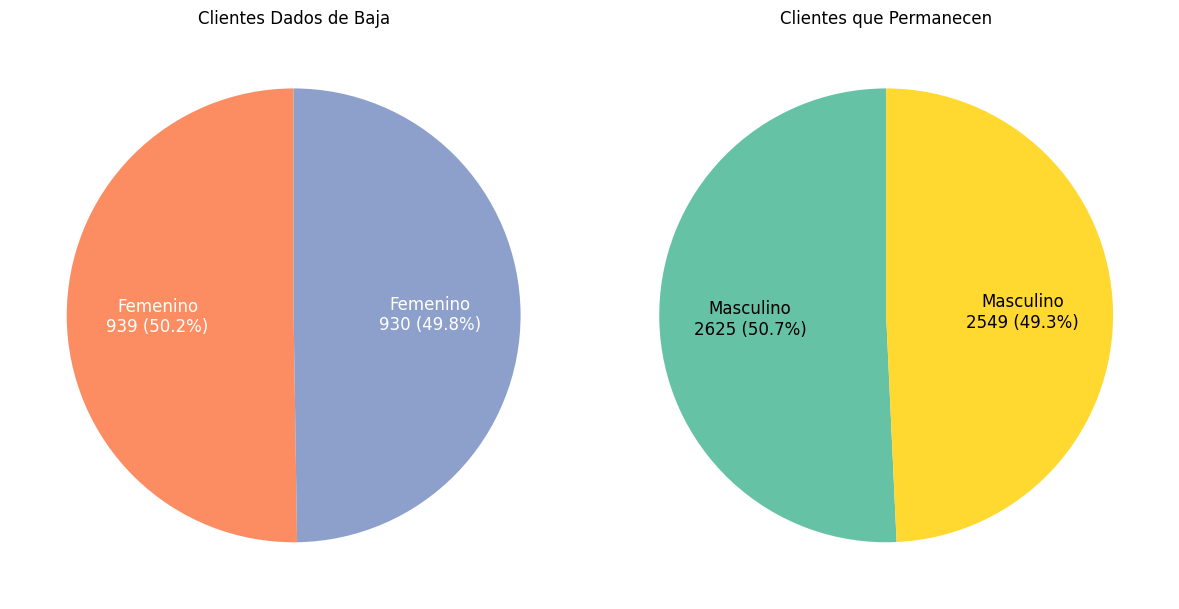

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Normalizar valores de cliente_genero
df['cliente_genero'] = df['cliente_genero'].str.lower().str.strip()

# Separar clientes
baja = df[df['baja_cliente'] == 1]
perm = df[df['baja_cliente'] == 0]

# Conteo y porcentaje
baja_genero = baja['cliente_genero'].value_counts()
perm_genero = perm['cliente_genero'].value_counts()

baja_pct = baja_genero / baja_genero.sum() * 100
perm_pct = perm_genero / perm_genero.sum() * 100

# Crear DataFrames resumen
tabla_baja = pd.DataFrame({
    'Cantidad': baja_genero,
    'Porcentaje (%)': baja_pct.round(2)
})

tabla_perm = pd.DataFrame({
    'Cantidad': perm_genero,
    'Porcentaje (%)': perm_pct.round(2)
})

# Mostrar tablas lado a lado
html = f"""
<div style="display: flex; gap: 50px;">
   <div>

  </div>
  <div>
    <h4 style='text-align:center;'>ðŸ“Œ Baja (baja_cliente = 1)</h4>
    {tabla_baja.to_html(index=True)}
  </div>
  <div>
    <h4 style='text-align:center;'>ðŸ“Œ Permanece (baja_cliente = 0)</h4>
    {tabla_perm.to_html(index=True)}
  </div>
</div>
"""
display(HTML(html))

# FunciÃ³n personalizada para autopct
def autopct_personalizado(valores, etiquetas):
    def formatear(pct):
        total = sum(valores)
        idx = int(round(pct / 100.0 * len(valores))) - 1
        valor = int(round(pct * total / 100.0))
        etiqueta = etiquetas[idx] if idx < len(etiquetas) else ""
        return f"{etiqueta}\n{valor} ({pct:.1f}%)"
    return formatear

# Datos y etiquetas
etiquetas_baja = baja_genero.index.str.capitalize()
etiquetas_perm = perm_genero.index.str.capitalize()

# Colores
colores_baja = ['#fc8d62', '#8da0cb']
colores_perm = ['#66c2a5', '#ffd92f']

# GrÃ¡ficos en paralelo
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# GrÃ¡fico 1: Clientes dados de baja
axs[0].pie(
    baja_genero,
    labels=None,
    autopct=autopct_personalizado(baja_genero.values, etiquetas_baja),
    startangle=90,
    colors=colores_baja,
    textprops={'fontsize': 12, 'color': 'white'}
)
axs[0].set_title('Clientes Dados de Baja')

# GrÃ¡fico 2: Clientes que permanecen
axs[1].pie(
    perm_genero,
    labels=None,
    autopct=autopct_personalizado(perm_genero.values, etiquetas_perm),
    startangle=90,
    colors=colores_perm,
    textprops={'fontsize': 12, 'color': 'black'}
)
axs[1].set_title('Clientes que Permanecen')

plt.tight_layout()
plt.show()


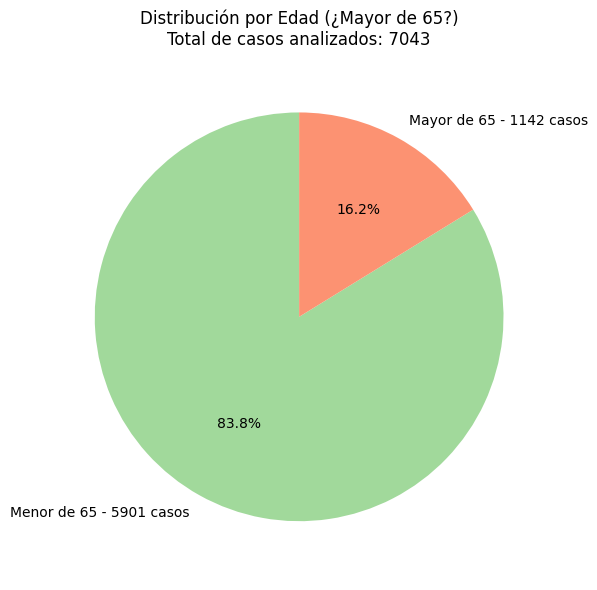

In [106]:
import matplotlib.pyplot as plt

# Conteo de valores
valores = df['cli_mayor_65'].value_counts()
total = valores.sum()

# Mapear etiquetas
etiquetas_dict = {0: 'Menor de 65', 1: 'Mayor de 65'}
etiquetas = [f'{etiquetas_dict[i]} - {valores[i]} casos' for i in valores.index]

# GrÃ¡fico
plt.figure(figsize=(6, 6))
plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#a1d99b', '#fc9272']
)
plt.title(f'DistribuciÃ³n por Edad (Â¿Mayor de 65?)\nTotal de casos analizados: {total}')
plt.axis('equal')  # CÃ­rculo perfecto
plt.tight_layout()
plt.show()

In [107]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_churn_barras_agrupadas(df, variable, ordenar_por=None):
    """
    GrÃ¡fico de barras agrupadas mostrando % de permanencia y baja por categorÃ­a.

    ParÃ¡metros:
    - df: DataFrame con columnas 'baja_cliente' y la variable categÃ³rica
    - variable: str, nombre de la variable categÃ³rica
    - ordenar_por: str, 'baja' (por % baja), 'total' (por cantidad), o None (sin ordenar)
    """

    # Filtrar datos vÃ¡lidos
    df_filtrado = df.dropna(subset=[variable, 'baja_cliente'])

    # Agrupar y calcular
    agrupado = df_filtrado.groupby(variable)['baja_cliente']
    baja_pct = agrupado.mean() * 100
    perm_pct = 100 - baja_pct
    conteo_total = agrupado.count()
    n_baja = agrupado.sum().astype(int)
    n_perm = (conteo_total - n_baja).astype(int)

    # Unificar en un DataFrame para ordenar
    tabla = (
        pd.DataFrame({
            'Baja (%)': baja_pct,
            'Permanece (%)': perm_pct,
            'Total': conteo_total,
            'NÂ° Baja': n_baja,
            'NÂ° Perm': n_perm
        })
    )

    # Ordenar si se solicita
    if ordenar_por == 'baja':
        tabla = tabla.sort_values(by='Baja (%)', ascending=False)
    elif ordenar_por == 'total':
        tabla = tabla.sort_values(by='Total', ascending=False)

    # Preparar valores para grÃ¡fico
    categorias = tabla.index.tolist()
    x = np.arange(len(categorias))
    width = 0.35
    total_clientes = conteo_total.sum()

    # Crear grÃ¡fico
    fig, ax = plt.subplots(figsize=(9, 4.5))

    # Barras
    ax.bar(x - width/2, tabla['Permanece (%)'], width, label='Permanecen (%)', color='seagreen')
    ax.bar(x + width/2, tabla['Baja (%)'], width, label='Baja (%)', color='indianred')

    # TÃ­tulos y etiquetas
    ax.set_title(f'DistribuciÃ³n de Baja vs Permanencia por {variable.replace("_", " ").capitalize()}', fontsize=12, pad=10)
    ax.text(0, 105, f'Total de clientes analizados: {total_clientes}', fontsize=9, ha='left')

    ax.set_ylabel('Porcentaje (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=0)
    ax.set_ylim(0, 115)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    # Etiquetas sobre las barras
    for i, cat in enumerate(categorias):
        # Permanecen
        ax.text(x[i] - width/2, tabla.loc[cat, 'Permanece (%)'] + 1,
                f"{tabla.loc[cat, 'Permanece (%)']:.1f}%", ha='center', fontsize=8)
        ax.text(x[i] - width/2, tabla.loc[cat, 'Permanece (%)'] + 7,
                f"{tabla.loc[cat, 'NÂ° Perm']} casos", ha='center', fontsize=8, color='gray')

        # Baja
        ax.text(x[i] + width/2, tabla.loc[cat, 'Baja (%)'] + 1,
                f"{tabla.loc[cat, 'Baja (%)']:.1f}%", ha='center', fontsize=8)
        ax.text(x[i] + width/2, tabla.loc[cat, 'Baja (%)'] + 7,
                f"{tabla.loc[cat, 'NÂ° Baja']} casos", ha='center', fontsize=8, color='gray')

    # Ajustar mÃ¡rgenes
    plt.subplots_adjust(top=0.85, bottom=0.15)
    plt.show()

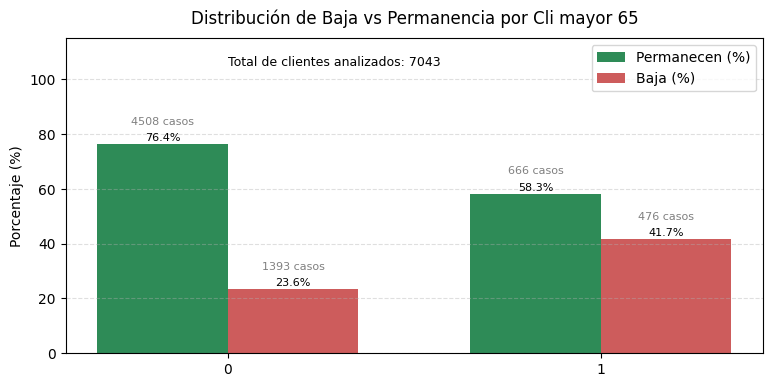

In [108]:
graficar_churn_barras_agrupadas(df, 'cli_mayor_65')

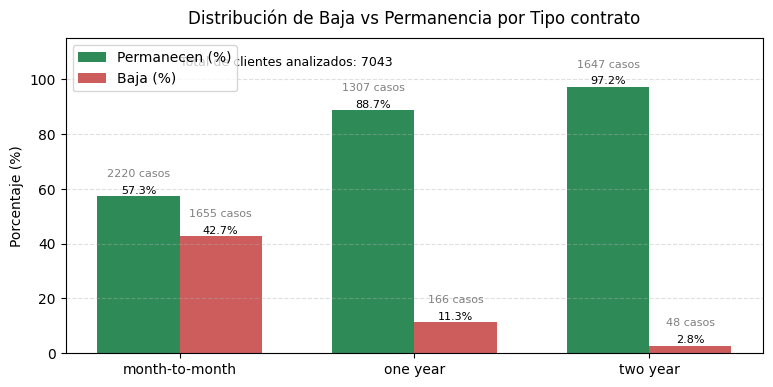

In [109]:
graficar_churn_barras_agrupadas(df, 'tipo_contrato')

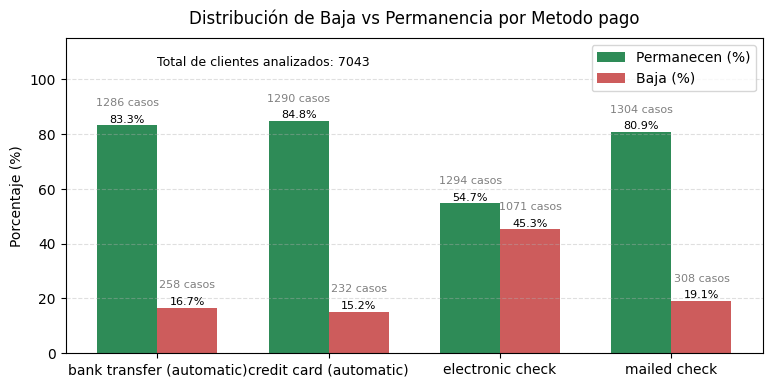

In [110]:

graficar_churn_barras_agrupadas(df, 'metodo_pago')

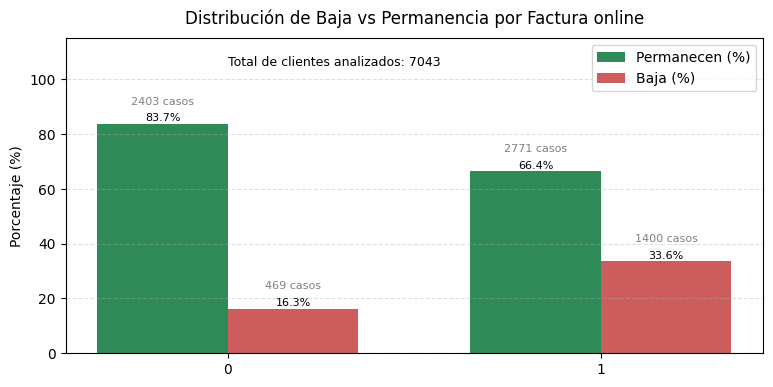

In [111]:

graficar_churn_barras_agrupadas(df, 'factura_online')

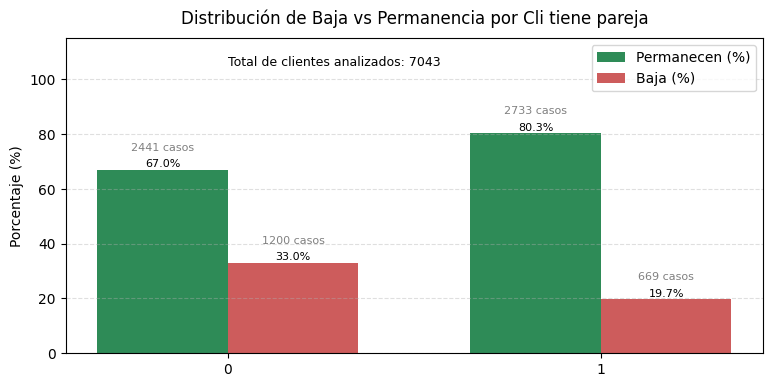

In [112]:
graficar_churn_barras_agrupadas(df, 'cli_tiene_pareja')

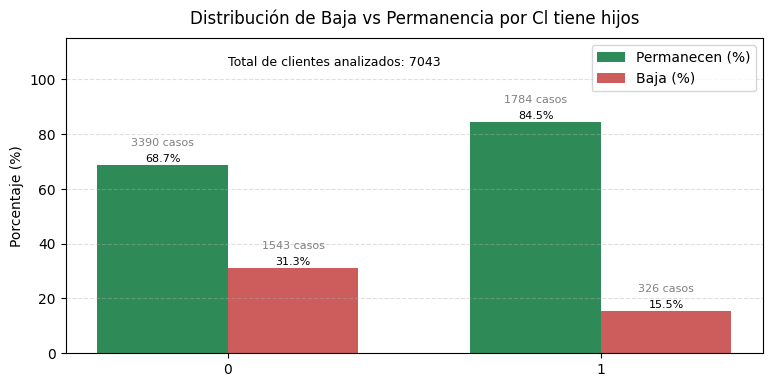

In [113]:
graficar_churn_barras_agrupadas(df, 'cl_tiene_hijos')

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_baja_vs_perm(df, variable):
    """
    GrÃ¡ficos compactos: % de baja vs % de permanencia por una variable categÃ³rica.
    """

    # Filtrar nulos en la variable
    df_filtrado = df.dropna(subset=[variable])

    # Calcular % de baja y % de permanencia
    baja_pct = df_filtrado.groupby(variable)['baja_cliente'].mean() * 100
    perm_pct = 100 - baja_pct

    # Crear figura mÃ¡s pequeÃ±a
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    # --- GrÃ¡fico 1: % Baja ---
    sns.barplot(
        x=baja_pct.index,
        y=baja_pct.values,
        color='salmon',  # Usamos color en lugar de palette
        ax=axs[0]
    )
    axs[0].set_title(f'% de Clientes Dados de Baja por {variable}', fontsize=11)
    axs[0].set_ylabel('Porcentaje (%)', fontsize=10)
    axs[0].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=10)
    axs[0].set_ylim(0, 100)
    axs[0].tick_params(axis='x', rotation=30, labelsize=9)
    axs[0].tick_params(axis='y', labelsize=9)

    for bar in axs[0].patches:
        height = bar.get_height()
        axs[0].text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8
        )

    # --- GrÃ¡fico 2: % Permanece ---
    sns.barplot(
        x=perm_pct.index,
        y=perm_pct.values,
        color='mediumseagreen',
        ax=axs[1]
    )
    axs[1].set_title(f'% de Clientes que Permanecen por {variable}', fontsize=11)
    axs[1].set_ylabel('', fontsize=10)
    axs[1].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=10)
    axs[1].set_ylim(0, 100)
    axs[1].tick_params(axis='x', rotation=30, labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)




    for bar in axs[1].patches:
        height = bar.get_height()
        axs[1].text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8
        )

    plt.tight_layout()
    plt.show()
    return None

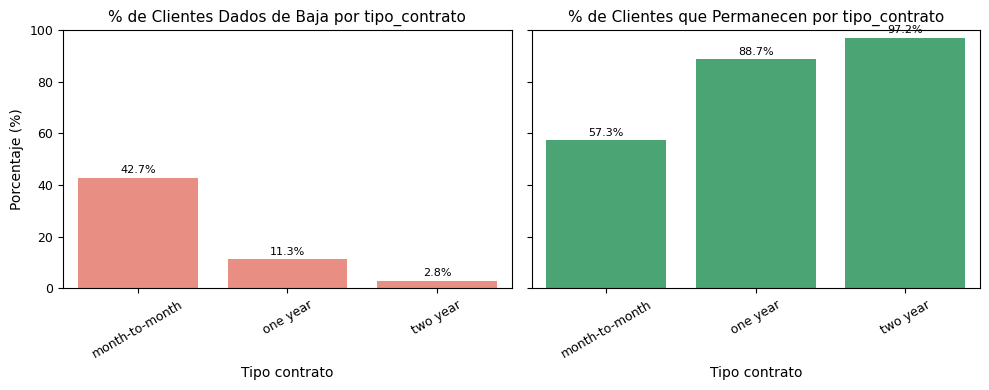

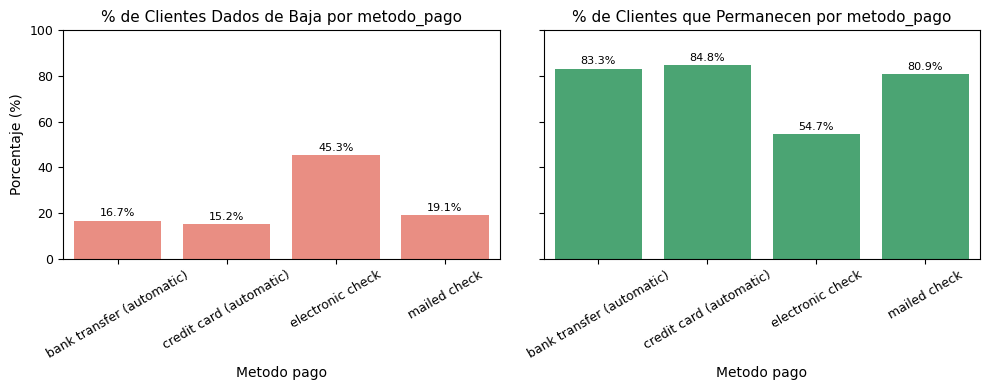

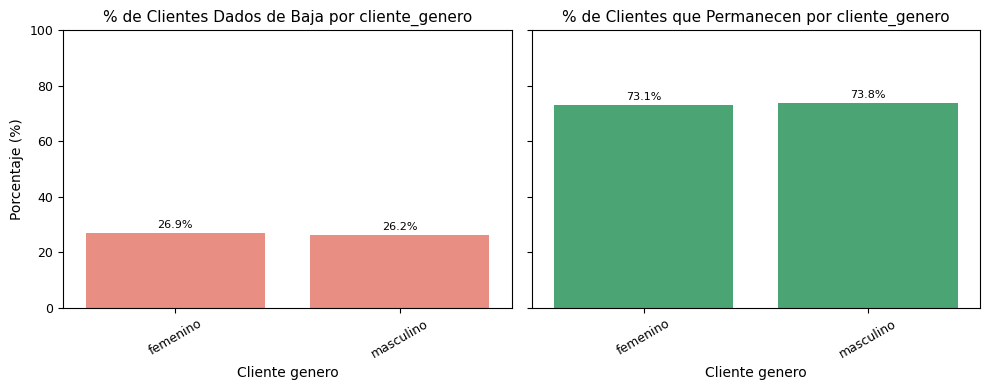

In [115]:
graficar_baja_vs_perm(df, 'tipo_contrato')
graficar_baja_vs_perm(df, 'metodo_pago')
graficar_baja_vs_perm(df, 'cliente_genero')

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_baja_vs_perm(df, variable):
    """
    GrÃ¡ficos compactos: % de baja vs % de permanencia por una variable categÃ³rica.
    """

    df_filtrado = df.dropna(subset=[variable])

    baja_pct = df_filtrado.groupby(variable)['baja_cliente'].mean() * 100
    perm_pct = 100 - baja_pct

    fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    # --- GrÃ¡fico 1: % Baja ---
    sns.barplot(
        x=baja_pct.index,
        y=baja_pct.values,
        color='salmon',
        ax=axs[0]
    )
    axs[0].set_title(f'% de Clientes Dados de Baja por {variable}', fontsize=11)
    axs[0].set_ylabel('Porcentaje (%)', fontsize=10)
    axs[0].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=10)
    axs[0].set_ylim(0, 100)
    axs[0].tick_params(axis='x', rotation=0, labelsize=9)
    axs[0].tick_params(axis='y', labelsize=9)

    for i, bar in enumerate(axs[0].patches):
        height = bar.get_height()
        label_x = bar.get_x() + bar.get_width() / 2
        valor = baja_pct.index[i]
        etiqueta = "SÃ­" if valor == 0 else "No"
        axs[0].text(label_x, height - 10, etiqueta, ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        axs[0].text(label_x, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

    # --- GrÃ¡fico 2: % Permanece ---
    sns.barplot(
        x=perm_pct.index,
        y=perm_pct.values,
        color='mediumseagreen',
        ax=axs[1]
    )
    axs[1].set_title(f'% de Clientes que Permanecen por {variable}', fontsize=11)
    axs[1].set_ylabel('', fontsize=10)
    axs[1].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=10)
    axs[1].set_ylim(0, 100)
    axs[1].tick_params(axis='x', rotation=0, labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)

    for i, bar in enumerate(axs[1].patches):
        height = bar.get_height()
        label_x = bar.get_x() + bar.get_width() / 2
        valor = perm_pct.index[i]
        etiqueta = "SÃ­" if valor == 0 else "No"
        axs[1].text(label_x, height - 10, etiqueta, ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        axs[1].text(label_x, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

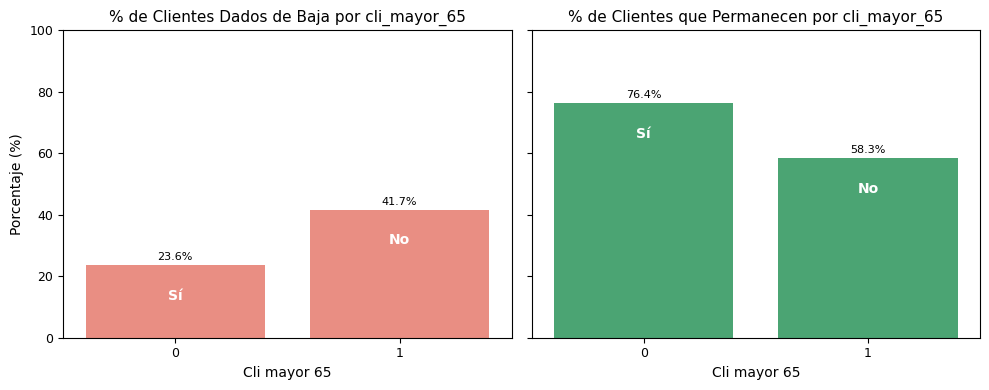

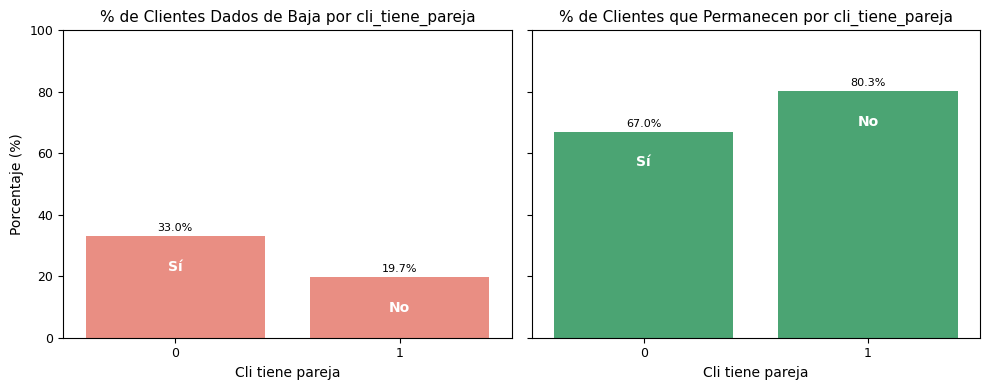

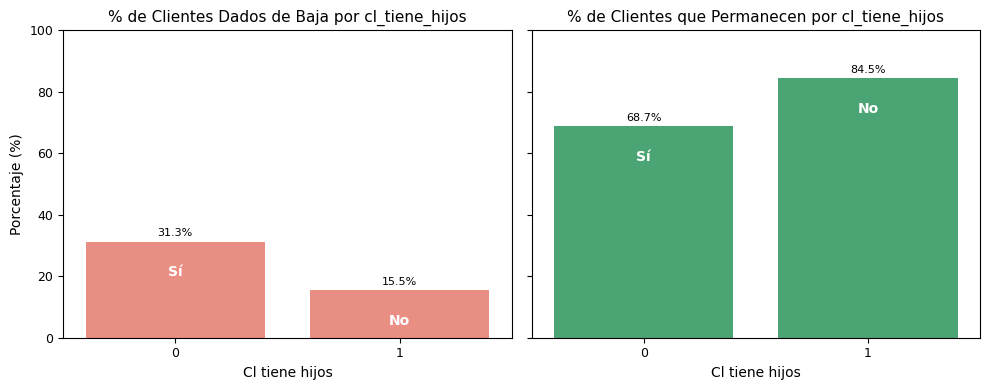

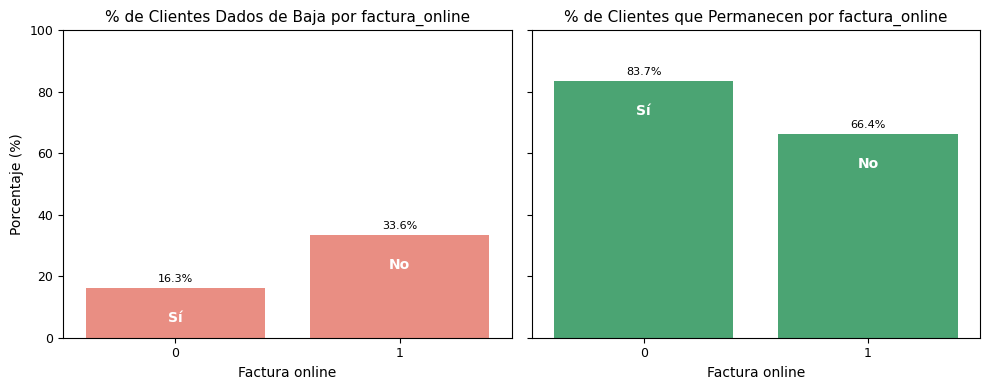

In [117]:
graficar_baja_vs_perm(df, 'cli_mayor_65')
graficar_baja_vs_perm(df, 'cli_tiene_pareja')
graficar_baja_vs_perm(df, 'cl_tiene_hijos')
graficar_baja_vs_perm(df, 'factura_online')

In [120]:
import matplotlib.pyplot as plt

def graficar_lineas_baja_vs_perm(df, variable):
    """
    GrÃ¡fico de lÃ­neas compacto que compara % de baja y % de permanencia por categorÃ­a.
    """

    # Eliminar nulos
    df_filtrado = df.dropna(subset=[variable])

    # Calcular % de baja y permanencia
    baja_pct = df_filtrado.groupby(variable)['baja_cliente'].mean() * 100
    perm_pct = 100 - baja_pct

    categorias = baja_pct.index.tolist()
    x = range(len(categorias))

    # GrÃ¡fico mÃ¡s compacto
    plt.figure(figsize=(7, 4))  # TamaÃ±o reducido

    # LÃ­nea % Baja
    plt.plot(x, baja_pct.values, marker='o', color='red', label='% Baja', linewidth=2)
    # LÃ­nea % Permanece
    plt.plot(x, perm_pct.values, marker='o', color='green', label='% Permanece', linewidth=2)

    # Etiquetas sobre los puntos
    for i, (b, p) in enumerate(zip(baja_pct.values, perm_pct.values)):
        plt.text(x[i], b + 1.5, f'{b:.1f}%', color='red', ha='center', fontsize=8)
        plt.text(x[i], p + 1.5, f'{p:.1f}%', color='green', ha='center', fontsize=8)

    plt.xticks(ticks=x, labels=categorias, rotation=0, fontsize=9)
    plt.yticks(fontsize=9)
    plt.ylabel('Porcentaje (%)', fontsize=10)
    plt.title(f'% Baja vs % Permanece por {variable.replace("_", " ").capitalize()}', fontsize=11)
    plt.ylim(0, 110)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()

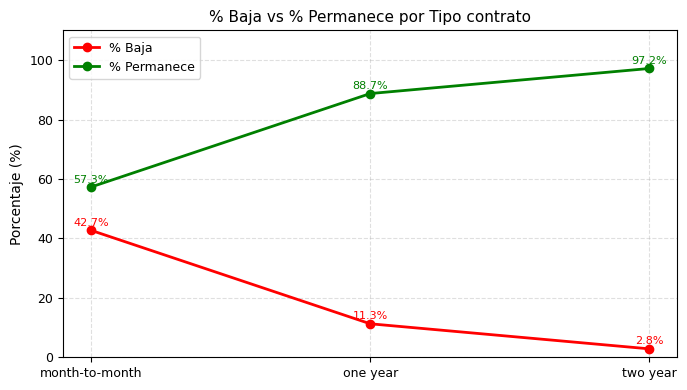

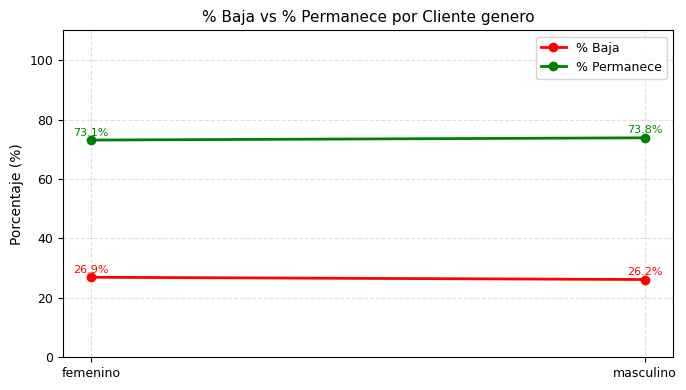

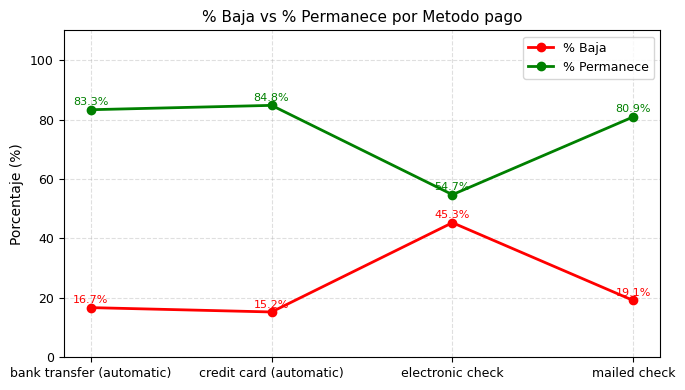

In [121]:
graficar_lineas_baja_vs_perm(df, 'tipo_contrato')
graficar_lineas_baja_vs_perm(df, 'cliente_genero')
graficar_lineas_baja_vs_perm(df, 'metodo_pago')

En este paso, explora cÃ³mo las variables numÃ©ricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasiÃ³n) y los que no cancelaron.

Este anÃ¡lisis ayuda a entender si ciertos valores numÃ©ricos estÃ¡n mÃ¡s asociados con la evasiÃ³n, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_distribucion_numericas(df, variables):
    """
    GrÃ¡ficos de distribuciÃ³n para variables numÃ©ricas,
    separados por evasiÃ³n (baja_cliente = 0 o 1).
    """
    for var in variables:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(data=df, x=var, hue='baja_cliente', fill=True, common_norm=False, palette='Set2')
        plt.title(f'DistribuciÃ³n de {var.replace("_", " ").capitalize()} segÃºn EvasiÃ³n')
        plt.xlabel(var.replace("_", " ").capitalize())
        plt.ylabel('Densidad')
        plt.legend(title='Baja cliente', labels=['No (0)', 'SÃ­ (1)'])
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

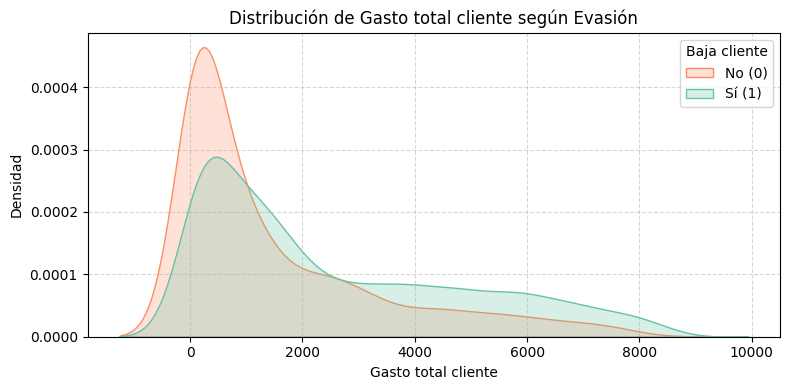

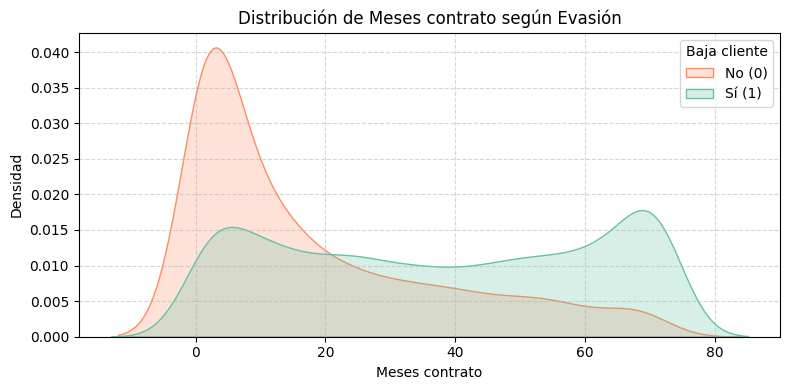

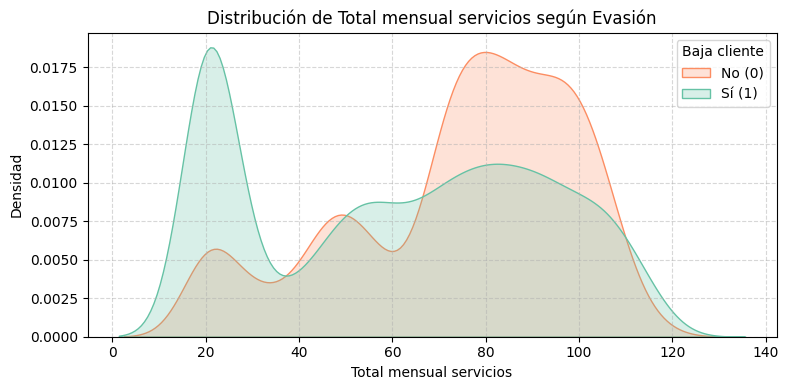

In [123]:
variables_numericas = ['gasto_total_cliente', 'meses_contrato', 'total_mensual_servicios']
graficar_distribucion_numericas(df, variables_numericas)

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def graficar_distribucion_y_boxplots_con_estadisticas(df, variables):
    """
    Para cada variable numÃ©rica:
    - Muestra distribuciÃ³n (KDE) y boxplot por baja_cliente
    - Imprime tabla estadÃ­stica (media, mediana, etc.) para cada grupo
    """
    for var in variables:
        # EstadÃ­sticas descriptivas por grupo
        estadisticas = df.groupby('baja_cliente')[var].agg(
            Media='mean',
            Mediana='median',
            DesvÃ­o_std='std',
            MÃ­nimo='min',
            MÃ¡ximo='max',
            Conteo='count'
        ).round(2)

        print(f'\n EstadÃ­sticas para: {var}')
        display(estadisticas)

        # GrÃ¡ficos
        fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

        # KDE
        sns.kdeplot(
            data=df,
            x=var,
            hue='baja_cliente',
            fill=True,
            common_norm=False,
            palette='Set2',
            ax=axs[0]
        )
        axs[0].set_title(f'DistribuciÃ³n de {var.replace("_", " ").capitalize()}')
        axs[0].set_xlabel(var.replace("_", " ").capitalize())
        axs[0].set_ylabel('Densidad')
        axs[0].legend(title='Baja cliente', labels=['No (0)', 'SÃ­ (1)'])
        axs[0].grid(True, linestyle='--', alpha=0.5)

        # Boxplot
        sns.boxplot(
            data=df,
            x='baja_cliente',
            y=var,
            palette='Set2',
            ax=axs[1]
        )
        axs[1].set_title(f'Boxplot de {var.replace("_", " ").capitalize()} por Baja')
        axs[1].set_xlabel('Baja cliente (0 = No, 1 = SÃ­)')
        axs[1].set_ylabel(var.replace("_", " ").capitalize())
        axs[1].grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.show()


 EstadÃ­sticas para: gasto_total_cliente


Media  Mediana  DesvÃ­o_std  MÃ­nimo   MÃ¡ximo  Conteo
baja_cliente                                                       
0             2549.91  1679.52     2329.95    0.00  8672.45    5174
1             1531.80   703.55     1890.82   18.85  8684.80    1869

/tmp/ipython-input-124-3317874158.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


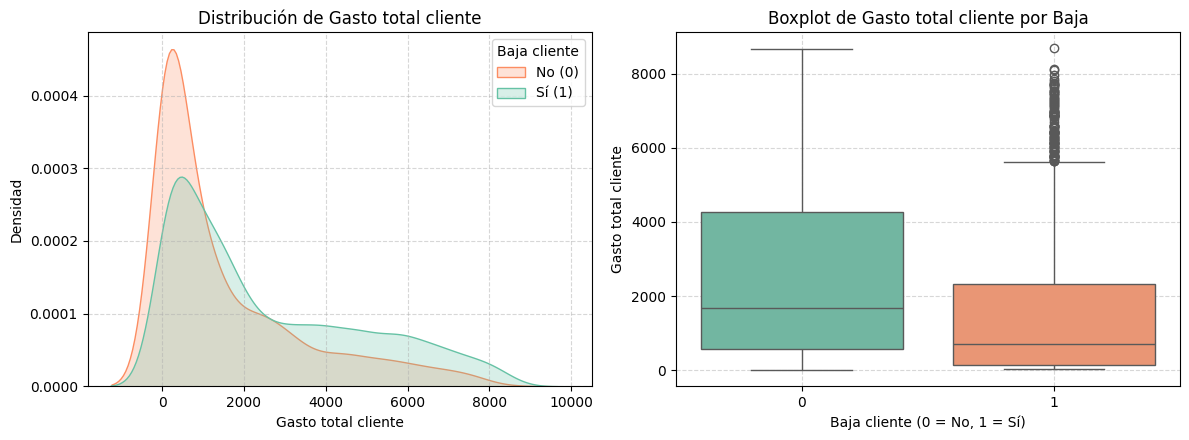


 EstadÃ­sticas para: meses_contrato


Media  Mediana  DesvÃ­o_std  MÃ­nimo  MÃ¡ximo  Conteo
baja_cliente                                                    
0             37.57     38.0       24.11       0      72    5174
1             17.98     10.0       19.53       1      72    1869

/tmp/ipython-input-124-3317874158.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


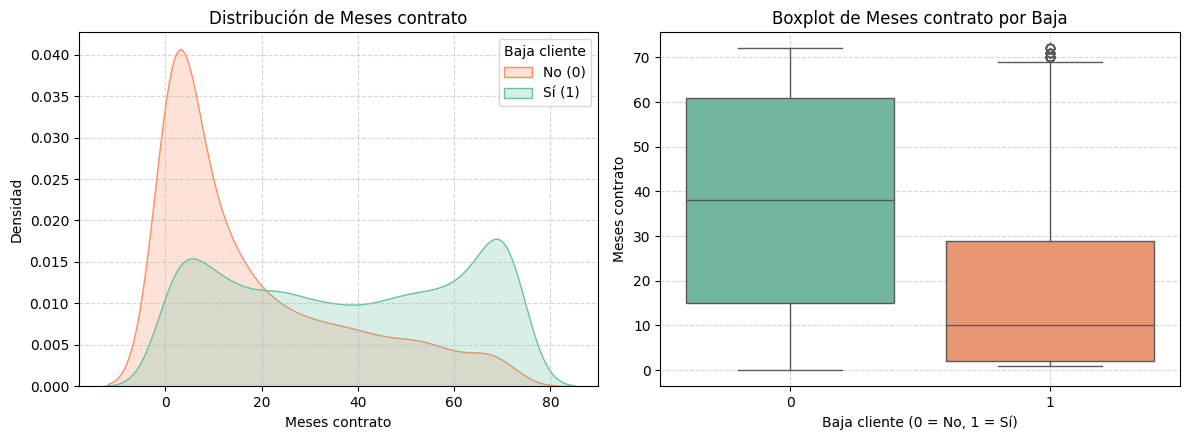


 EstadÃ­sticas para: total_mensual_servicios


Media  Mediana  DesvÃ­o_std  MÃ­nimo  MÃ¡ximo  Conteo
baja_cliente                                                    
0             61.27    64.43       31.09   18.25  118.75    5174
1             74.44    79.65       24.67   18.85  118.35    1869

/tmp/ipython-input-124-3317874158.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


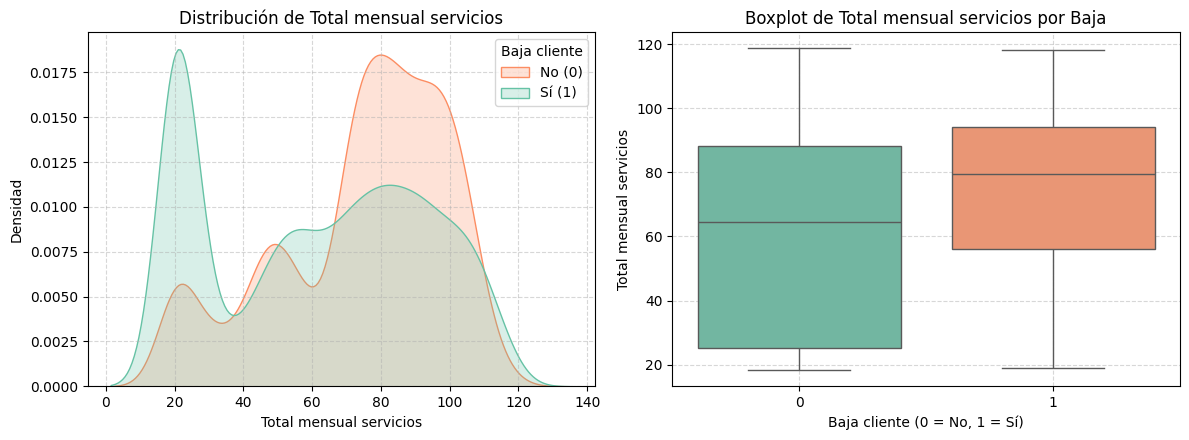

In [125]:
variables_numericas = ['gasto_total_cliente', 'meses_contrato', 'total_mensual_servicios']
graficar_distribucion_y_boxplots_con_estadisticas(df, variables_numericas)

#ðŸ“„Informe final

#  Informe Final - AnÃ¡lisis de EvasiÃ³n de Clientes (Churn)

##  IntroducciÃ³n

Este proyecto tiene como objetivo analizar el comportamiento de los clientes de una empresa de telecomunicaciones para identificar patrones relacionados con la evasiÃ³n (churn). Comprender las causas de la baja de clientes permite diseÃ±ar estrategias de retenciÃ³n efectivas y mejorar la rentabilidad a largo plazo.

---

##  Limpieza y Tratamiento de Datos

Se realizÃ³ una preparaciÃ³n cuidadosa del dataset original que incluyÃ³ los siguientes pasos:

- EliminaciÃ³n de registros con valores nulos en la variable objetivo (`baja_cliente`).
- ImputaciÃ³n de valores faltantes en la variable `gasto_total_cliente`, utilizando la fÃ³rmula:  
  `gasto_total_cliente = meses_contrato * total_mensual_servicios`.
- Reemplazo de valores categÃ³ricos (`yes`, `no`) por valores numÃ©ricos (`1`, `0`) para facilitar el anÃ¡lisis.
- EstandarizaciÃ³n de etiquetas como gÃ©nero (`female` â†’ `femenino`, `male` â†’ `masculino`).
- ConversiÃ³n de variables relevantes al tipo `int64`.
- ExportaciÃ³n del dataset limpio para su reutilizaciÃ³n.

---

##  AnÃ¡lisis Exploratorio de Datos

Se realizaron mÃºltiples anÃ¡lisis visuales y estadÃ­sticos para entender cÃ³mo se relacionan las variables con la evasiÃ³n de clientes:

- **DistribuciÃ³n general de bajas vs. permanencia** (grÃ¡fico de torta ).
- **RelaciÃ³n entre churn y variables categÃ³ricas**, como gÃ©nero, tipo de contrato, mÃ©todo de pago, etc.
- **Visualizaciones con porcentajes y cantidades reales**, utilizando grÃ¡ficos agrupados, dispersiÃ³n y lÃ­neas.
- **AnÃ¡lisis de variables numÃ©ricas**, como `meses_contrato`, `gasto_total_cliente` y `total_mensual_servicios`, mediante KDE y boxplots.


---

##  Conclusiones e Insights

- Los clientes con **contratos mensuales** presentan una tasa de baja significativamente mayor.
- Aquellos que **usan facturaciÃ³n electrÃ³nica** tambiÃ©n tienen una mayor propensiÃ³n a cancelar el servicio.
- El tiempo de permanencia (meses de contrato) y el gasto total son variables clave:  
  **clientes que se quedan tienden a tener contratos mÃ¡s largos y mayor inversiÃ³n total.**
- El churn no presenta diferencias significativas por gÃ©nero ni por si tienen hijos o pareja.
- El churn  presenta diferencias aunque no tan significativas ante las condiciones  si tienen hijos o pareja.
 -Enfocarse en el segmento de clientes mayorea a 65 aÃ±os.
---

---

##  Recomendaciones

- Incentivar contratos a largo plazo con beneficios exclusivos (bonificaciones, descuentos).
- Ofrecer **opciones alternativas a la facturaciÃ³n electrÃ³nica**, o mejorar su experiencia de uso.
- Implementar un sistema de alertas tempranas para clientes con baja antigÃ¼edad y bajo consumo.
- Desarrollar campaÃ±as personalizadas para grupos con mayor riesgo de baja, basadas en los patrones encontrados.

---

##  Recursos Generados

-datos_tratados.csv    
- GrÃ¡ficos visuales, tablas e informes intermedios incluidos en este notebook.